**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary_v2"
)
txt_fname = "matrix.annotation.prepare.cres_vote1_gcfilter.chipseq_full.fcc.tss.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

mat_region_annot_full_cres = dat
print(dim(dat))
head(dat, 3)

[1] 87610   537


Region,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,LMPRA_R,TMPRA_R,CRISPRi-HCRFF:CASA,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:10038-10405,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:16025-16338,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:115429-115969,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0


In [3]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary_v2"
)
txt_fname = "umap.cluster.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)
print(txt_fpath)
dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_umap_cluster = dat
print(dim(dat))
head(dat, 3)

[1] "/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary_v2/umap.cluster.tsv"
[1] 87610     4


Region,UMAP1,UMAP2,Cluster
<chr>,<dbl>,<dbl>,<dbl>
chr1:10038-10405,-21.87767,-9.176196,39
chr1:16025-16338,-12.15321,-12.879920,20
chr1:115429-115969,-11.02704,-3.031374,0


In [4]:
dat = dat_region_umap_cluster
dat = dat %>%
    dplyr::left_join(mat_region_annot_full_cres, by = "Region") %>%
    replace(is.na(.), 0)

dat_region_merge = dat
print(dim(dat))
head(dat)

[1] 87610   540


Region,UMAP1,UMAP2,Cluster,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:10038-10405,-21.87767,-9.1761960,39,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:16025-16338,-12.15321,-12.8799200,20,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:115429-115969,-11.02704,-3.0313742,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
chr1:184091-184563,-20.69949,-0.9725588,24,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:186343-187136,-17.25740,-12.4815150,21,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:191204-191722,-21.78103,-13.9010320,5,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0


In [5]:
length(unique(dat_region_merge$Region))

[1] 87610

In [6]:
dat = dat_region_merge
table(dat$Cluster)


   -1     0     1     2     3     4     5     6     7     8     9    10    11 
   75 15633 12718  9102  6425  4213  3406  2879  2516  2149  2048  1726  1635 
   12    13    14    15    16    17    18    19    20    21    22    23    24 
 1600  1500  1345  1185  1149  1107  1078  1077  1065   986   896   785   658 
   25    26    27    28    29    30    31    32    33    34    35    36    37 
  655   621   588   583   566   498   473   441   441   439   432   426   352 
   38    39    40    41    42    43    44    45    46 
  347   287   275   272   235   231   190   166   136 

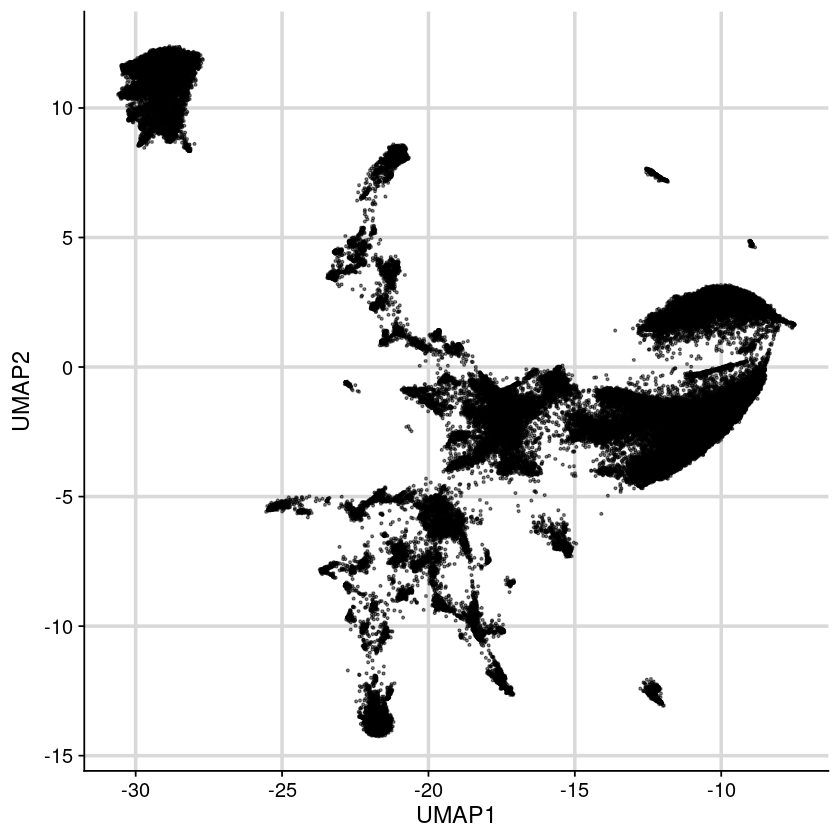

In [7]:
dat = dat_region_merge
gpt = ggplot(dat, aes(x = UMAP1, y = UMAP2)) +
    geom_point(size = 0.5, alpha = 0.5) +
    theme_cowplot() +
    background_grid(size.major = 1)

options(repr.plot.height = 7, repr.plot.width = 7)
print(gpt)

In [8]:
dat = dat_region_merge
dat = dat %>% 
    dplyr::filter(Cluster < 10, Cluster >= 0) %>% 
    dplyr::mutate(Cluster = as.character(Cluster))
dat_region_merge_sub = dat
print(dim(dat))
head(dat)

[1] 61089   540


Region,UMAP1,UMAP2,Cluster,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:115429-115969,-11.027042,-3.031374,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
chr1:191204-191722,-21.781030,-13.901032,5,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:202166-202422,-21.719149,-13.832686,5,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:267910-268557,-29.426582,12.034660,2,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:605104-605675,-13.669258,-1.011601,3,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:778233-779389,-9.192992,2.744334,1,1,1,1,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0


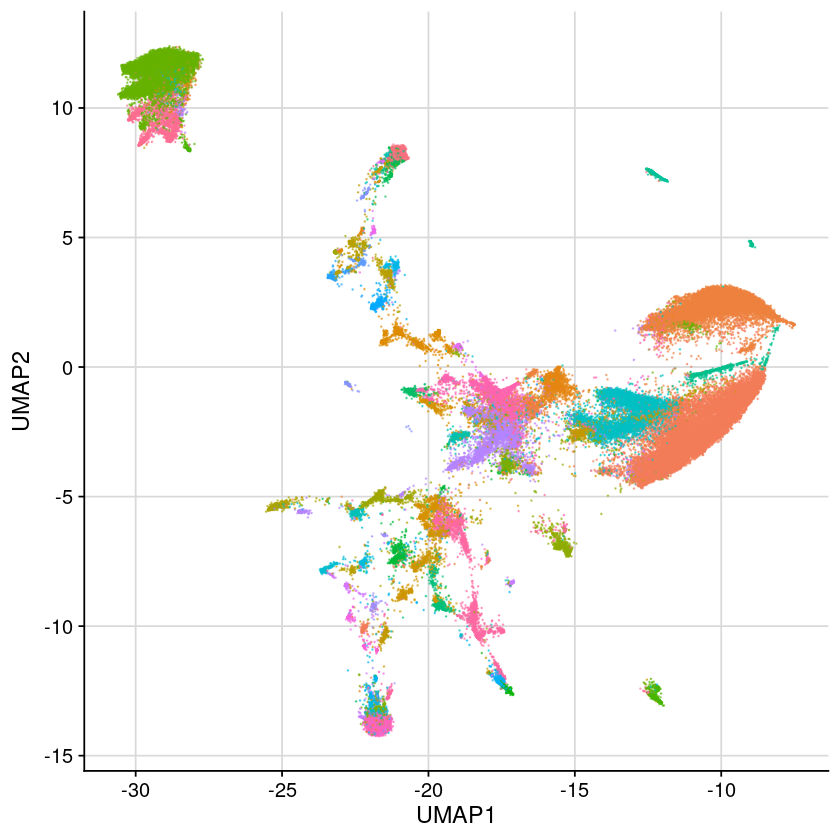

In [9]:
dat = dat_region_merge
dat = dat %>% dplyr::mutate(Cluster = as.character(Cluster))
gpt = ggplot() +
    geom_point(data=dat, aes(x=UMAP1, y=UMAP2,  color=Cluster), size=0.1, alpha=0.5) +
    #scale_color_brewer(palette = "Set2") +
    theme_cowplot() +
    background_grid() +
    theme(legend.position = "none")

options(repr.plot.height = 7, repr.plot.width = 7)
print(gpt)

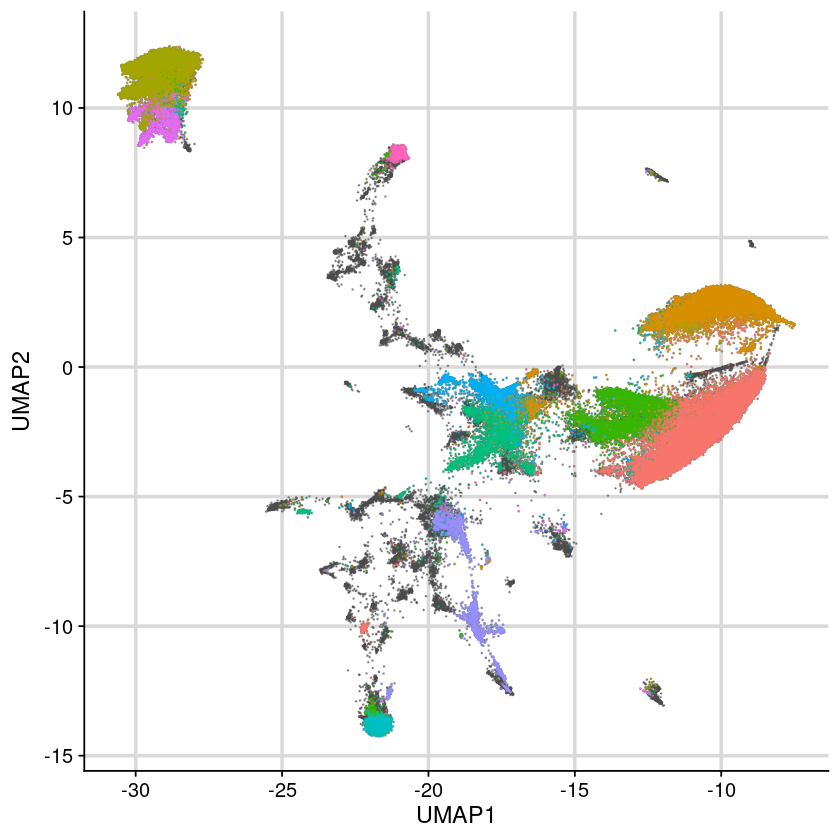

In [10]:
dat1 = dat_region_merge
dat2 = dat_region_merge_sub
gpt = ggplot() +
    geom_point(data=dat1, aes(x=UMAP1, y=UMAP2), color="grey30", size=0.1, alpha=0.5) +
    geom_point(data=dat2, aes(x=UMAP1, y=UMAP2,  color=Cluster), size=0.1, alpha=0.5) +
    #scale_color_brewer(palette = "Set2") +
    theme_cowplot() +
    background_grid(size.major = 1) +
    theme(legend.position = "none")

options(repr.plot.height = 7, repr.plot.width = 7)
print(gpt)

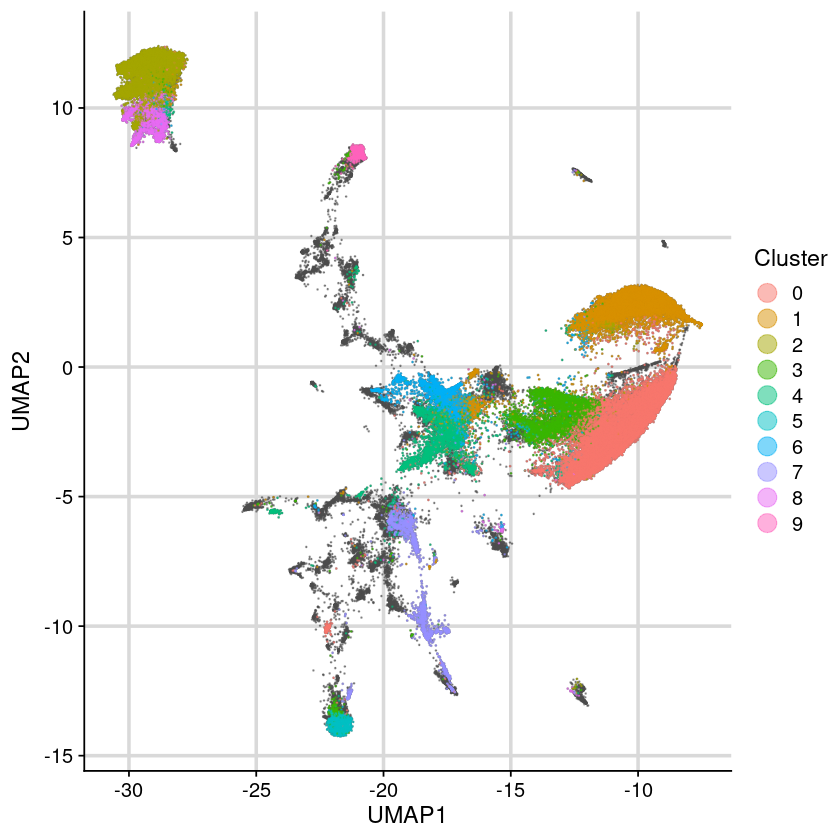

In [14]:
dat1 = dat_region_merge
dat2 = dat_region_merge_sub
gpt = ggplot() +
    geom_point(data=dat1, aes(x=UMAP1, y=UMAP2), color="grey30", size=0.1, alpha=0.5) +
    geom_point(data=dat2, aes(x=UMAP1, y=UMAP2,  color=Cluster), size=0.1, alpha=0.5) +
    #scale_color_brewer(palette = "Set2") +
    theme_cowplot() +
    background_grid(size.major = 1) +
    guides(colour = guide_legend(override.aes = list(size=5)))

options(repr.plot.height = 7, repr.plot.width = 7)
print(gpt)

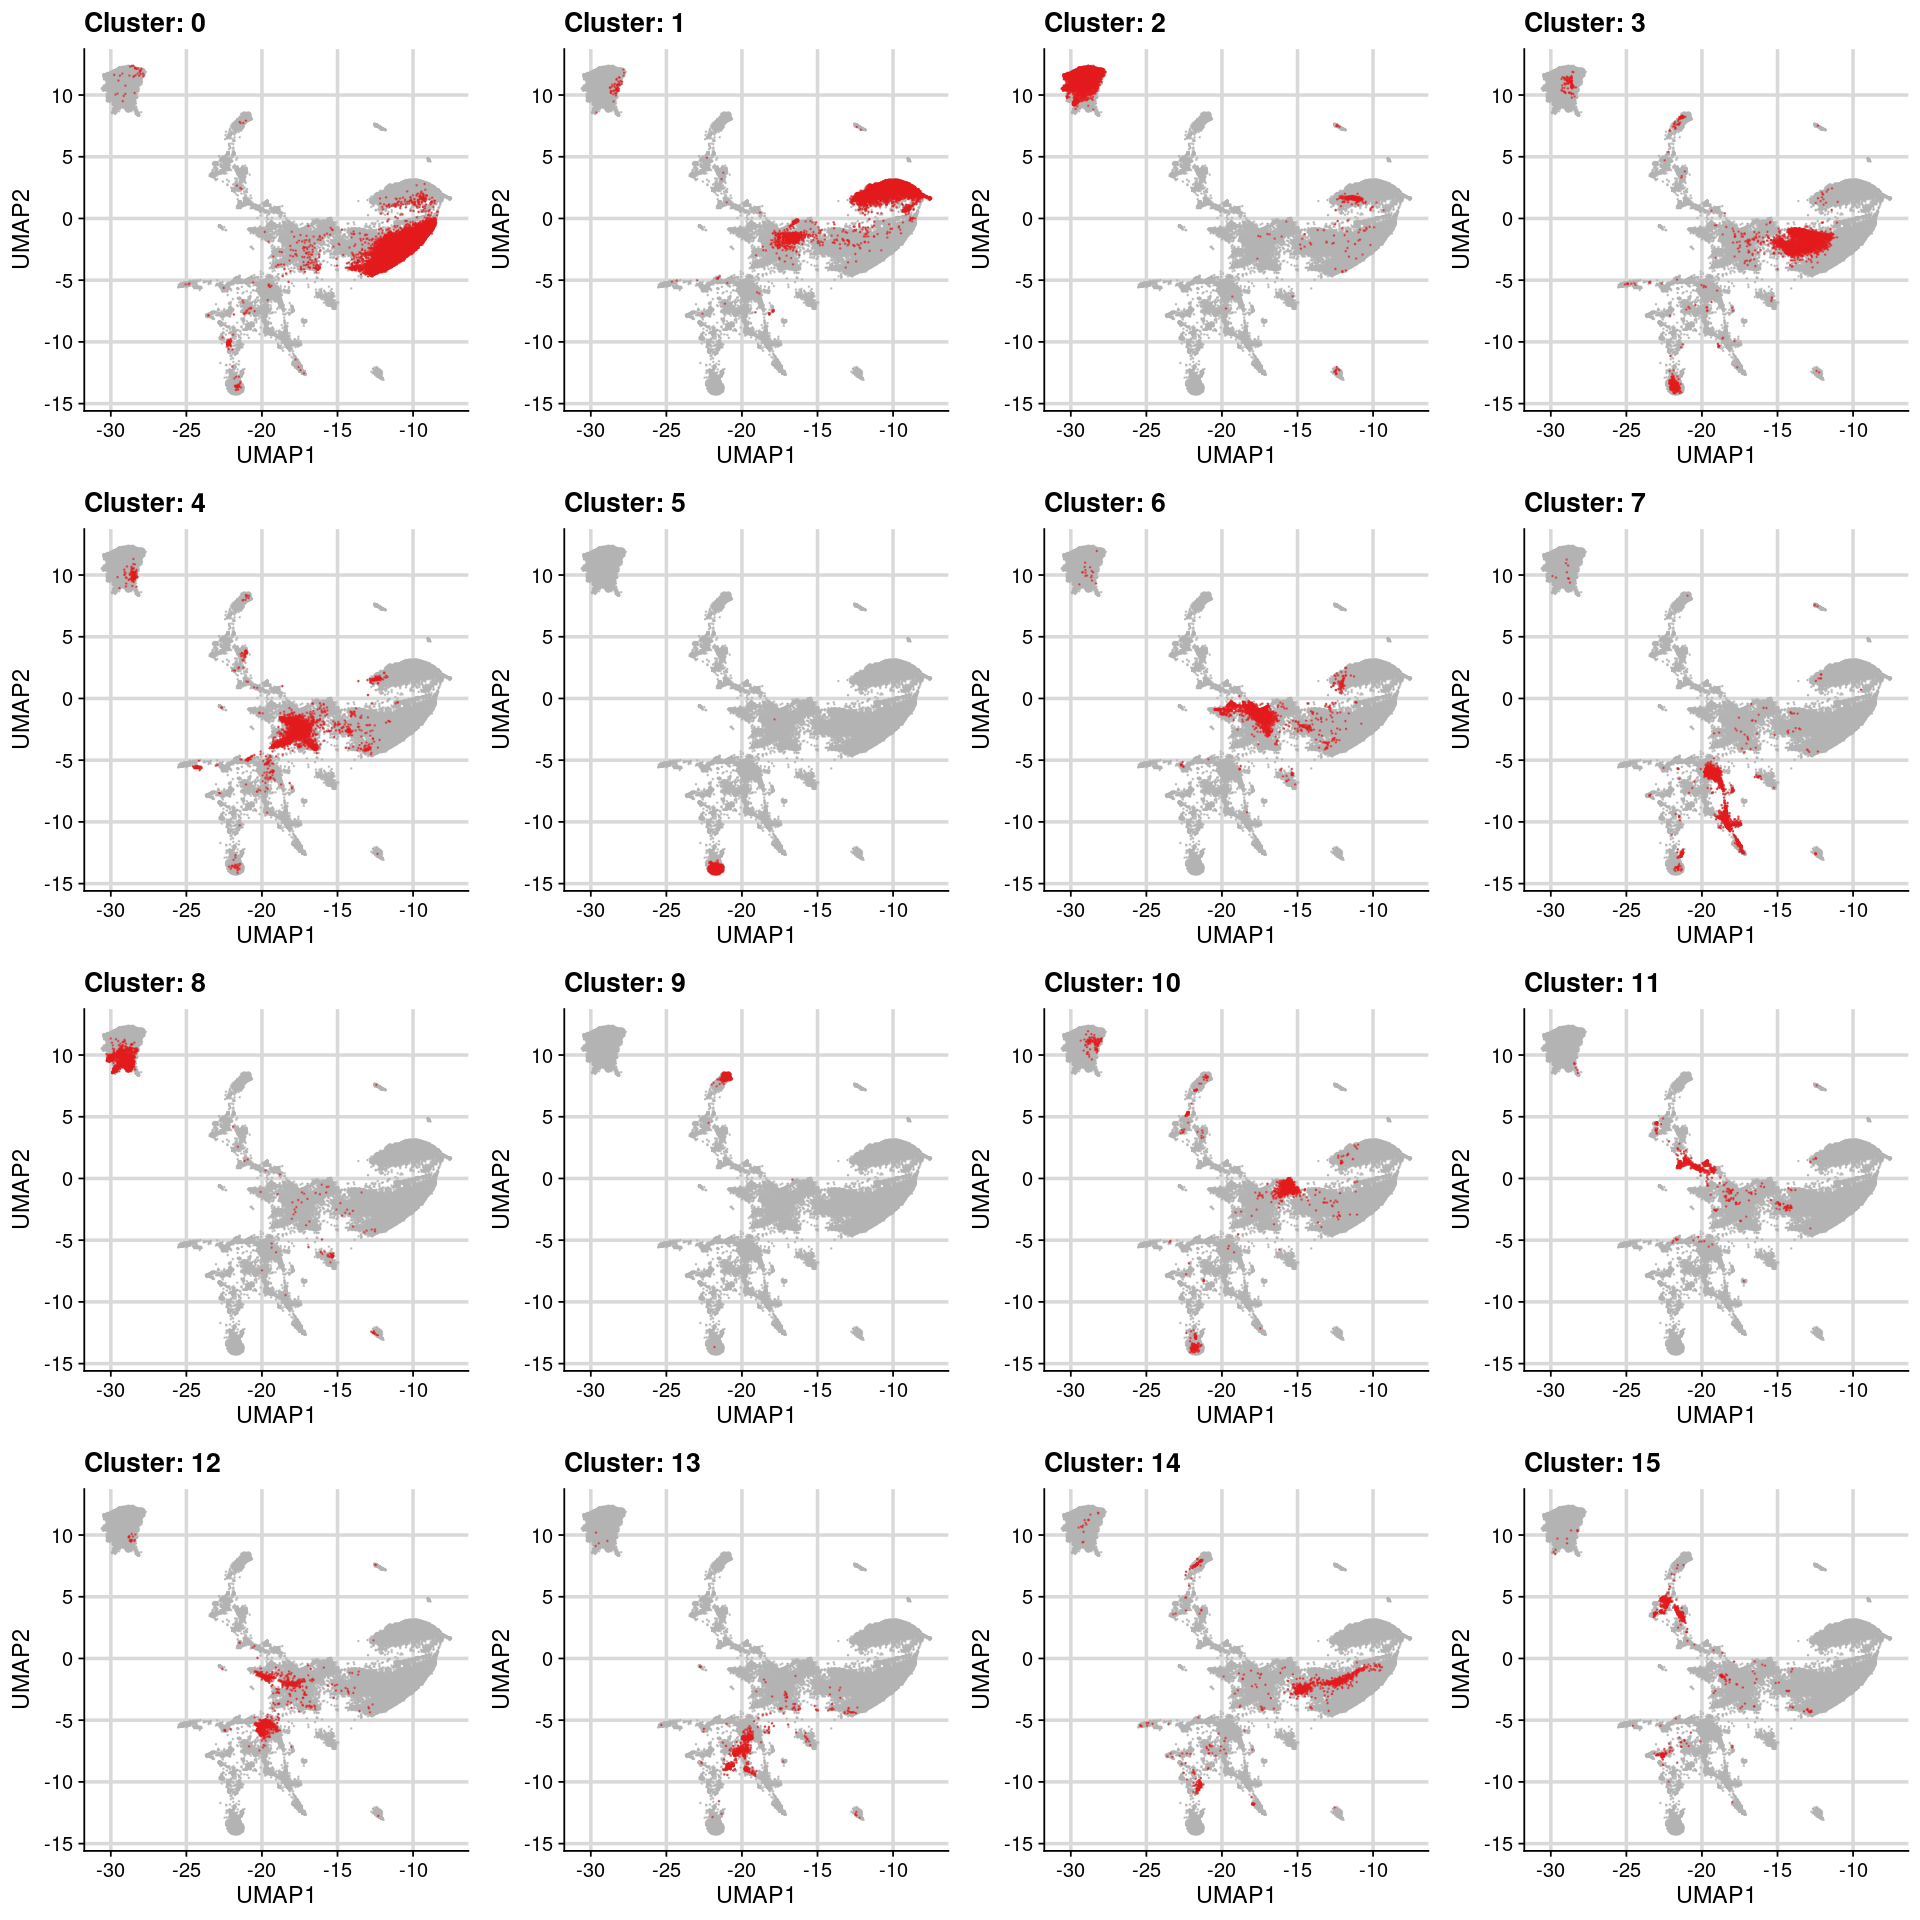

In [28]:
lst = lapply(0:15, function(idx){
    txt  = paste("Cluster:", idx)
    dat1 = dat_region_merge
    dat2 = dat_region_merge %>% 
        dplyr::filter(Cluster == idx) %>% 
        dplyr::mutate(Cluster = as.character(Cluster))
    
    gpt = ggplot() +
        geom_point(data=dat1, aes(x=UMAP1, y=UMAP2), color="grey70",  size=0.1, alpha=0.7) +
        geom_point(data=dat2, aes(x=UMAP1, y=UMAP2), color="#e41a1c", size=0.1, alpha=0.5) +
        labs(title = txt) +
        theme_cowplot() +
        background_grid(size.major = 1)

    return(gpt)
})

options(repr.plot.height = 16, repr.plot.width = 16)
plot_grid(
    plotlist = lst, 
    nrow = 4
)

In [20]:
idx = 0
dat = dat_region_merge
dat = dat %>% 
    dplyr::filter(Cluster == idx) %>% 
    dplyr::mutate(Cluster = as.character(Cluster))
dat_region_merge_target = dat
print(dim(dat))
head(dat)

[1] 15633   540


Region,UMAP1,UMAP2,Cluster,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:115429-115969,-11.027042,-3.0313742,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
chr1:842516-843431,-12.669045,-3.7757118,0,1,0,1,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:1005094-1005553,-9.613033,-0.9547396,0,1,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:1109562-1110412,-10.574397,-2.1163864,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:1185016-1185979,-10.517364,-0.9686223,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,1,0,0
chr1:1433071-1434080,-9.595177,-1.4009329,0,1,1,0,0,1,0,⋯,0,0,0,1,0,0,1,0,0,0


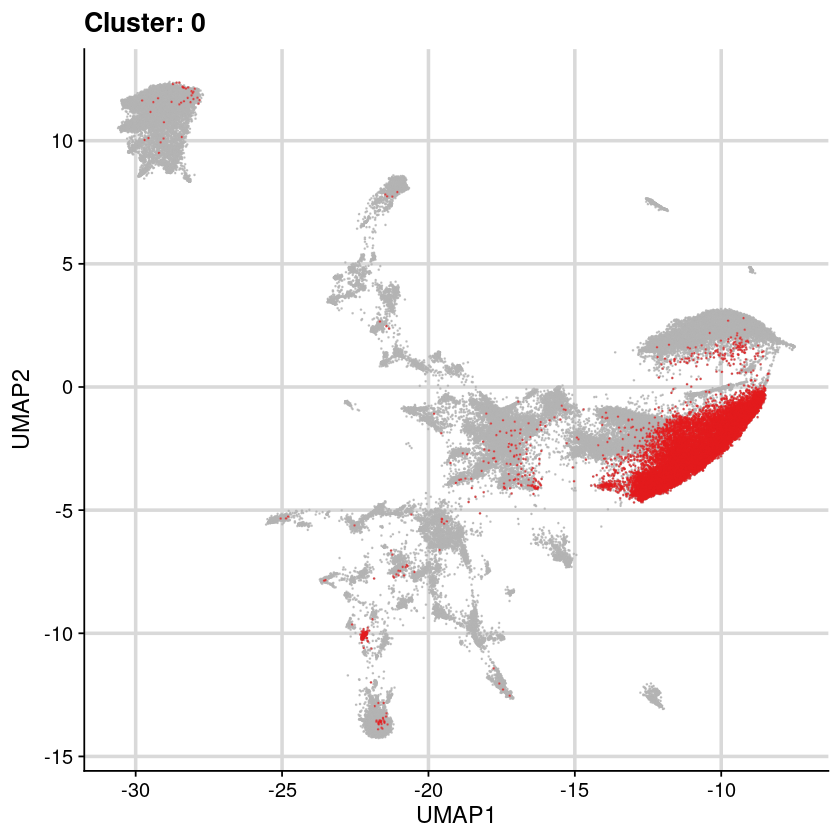

In [25]:
txt  = paste("Cluster:", idx)
dat1 = dat_region_merge
dat2 = dat_region_merge_target
gpt = ggplot() +
    geom_point(data=dat1, aes(x=UMAP1, y=UMAP2), color="grey70",  size=0.1, alpha=0.7) +
    geom_point(data=dat2, aes(x=UMAP1, y=UMAP2), color="#e41a1c", size=0.1, alpha=0.5) +
    #scale_color_brewer(palette = "Set2") +
    labs(title = txt) +
    theme_cowplot() +
    background_grid(size.major = 1) +
    guides(colour = guide_legend(override.aes = list(size=5)))

options(repr.plot.height = 7, repr.plot.width = 7)
print(gpt)